<CENTER style="font-size:40px;">Experiment 10</CENTER>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table style="width: 100%;">
  <tr>
    <td>Name</td>
    <td>Pranay Singhvi</td>
  </tr>
  <tr>
    <td>UID</td>
    <td>2021300126</td>
  </tr>
</table>


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky col1">HONOR PLEDGE</th>
    <th class="tg-0pky col2">
        <img src="../1_/Honour.jpeg" alt="honor pledge">
    </th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky col1">PROBLEM STATEMENT</td>
    <td class="tg-0pky col2" style="font-size:16px;">
      Forecasting using ARIMA(p, d, q)

Create an ARIMA forecast model for the stocks dataset used by you in Experiment 8.

Following things need to be done:

1. Check stationarity of dataset using Augmented Dickey-Fuller test. If data is non-stationary, identify the value of 'd' which converts data to stationary data
2. Identify coefficients 'p' and 'q' using Auto-correlation Function (ACF) & Partial auto-correlation function (PACF) plots
3. Fit an ARIMA model on 80% of the historic data (train) using the p,q and d parameters and use the recent 20% data as 'test'
4. Evaluate the fitted model on various statistical metrics for error on 'train' and 'test'
5. Assess the model on metrics that calculate goodness of fit on 'train' and 'test'
6. Compare the performance of this model with your previously trained OLS model in Experiment 8
7. Compute Theil's coefficient of the 2 forecasts (OLS, ARIMA) for any one stock forecast  


Add ACF, PACF plots and plots of the Actuals, Predictions and Residuals for each of the stocks
    </td>
  </tr>
  <tr>
    <td class="tg-0pky col1">THEORY</td>
    <td class="tg-0pky col2">
    
1. **Stationarity Check**:
   - Stationarity is a crucial assumption in time series analysis, implying that the statistical properties of a time series do not change over time.
   - The Augmented Dickey-Fuller (ADF) test is commonly used to check for stationarity. If the data is non-stationary, it means that there is a trend or seasonality present, and differencing (parameter 'd' in ARIMA) is needed to make it stationary.

2. **Identify Model Parameters**:
   - ARIMA model has three main parameters: p, d, and q.
   - **p (AR term)**: It represents the number of lag observations included in the model, which captures the auto-regressive nature of the series. It is identified using the Partial Autocorrelation Function (PACF) plot.
   - **d (Integration term)**: It represents the number of differencing required to make the series stationary.
   - **q (MA term)**: It represents the size of the moving average window, which captures the moving average nature of the series. It is identified using the Autocorrelation Function (ACF) plot.

3. **Train-Test Split**:
   - Split the dataset into training and testing sets. Typically, 80% of the data is used for training and the remaining 20% for testing.

4. **Model Fitting**:
   - Fit the ARIMA model on the training data using the identified values of p, d, and q.

5. **Model Evaluation**:
   - Evaluate the fitted model on both training and testing data using various statistical metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), etc.
   - Assess the goodness of fit on both training and testing data, possibly using metrics like R-squared, Adjusted R-squared, etc.

6. **Comparison with Other Models**:
   - Compare the performance of the ARIMA model with other forecasting models, such as Ordinary Least Squares (OLS) regression, to determine which model performs better for the given dataset.

7. **Theil's Coefficient**:
   - Theil's coefficient is a measure of forecast accuracy that compares the accuracy of predictions from different forecasting methods. It can be computed for the forecasts obtained from both OLS and ARIMA models for any one stock forecast.
    </td>
  </tr>
</tbody>
</table> 

### 1. Importing Libraries

In [102]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import seaborn as sns

### 2. Stock Data

In [87]:
# Define the date parser
dateparse = lambda dates: pd.to_datetime(dates, format='%m/%d/%Y')

# Read the CSV file
stock_data = pd.read_csv('AAPL(80-24) Final.csv', sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

# Display the data
stock_data = stock_data[::-1]
stock_data


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1980-12-12,0.13,0.13,0.13,0.13,469.03M,-99.88%
1980-12-15,0.12,0.12,0.12,0.12,175.88M,-7.69%
1980-12-16,0.11,0.11,0.11,0.11,105.73M,-8.33%
1980-12-17,0.12,0.12,0.12,0.12,86.44M,9.09%
1980-12-18,0.12,0.12,0.12,0.12,73.45M,0.00%
...,...,...,...,...,...,...
2024-03-21,171.37,177.05,177.49,170.84,106.18M,-4.09%
2024-03-22,172.28,171.76,173.05,170.06,71.16M,0.53%
2024-03-25,170.85,170.37,171.94,169.46,54.21M,-0.83%


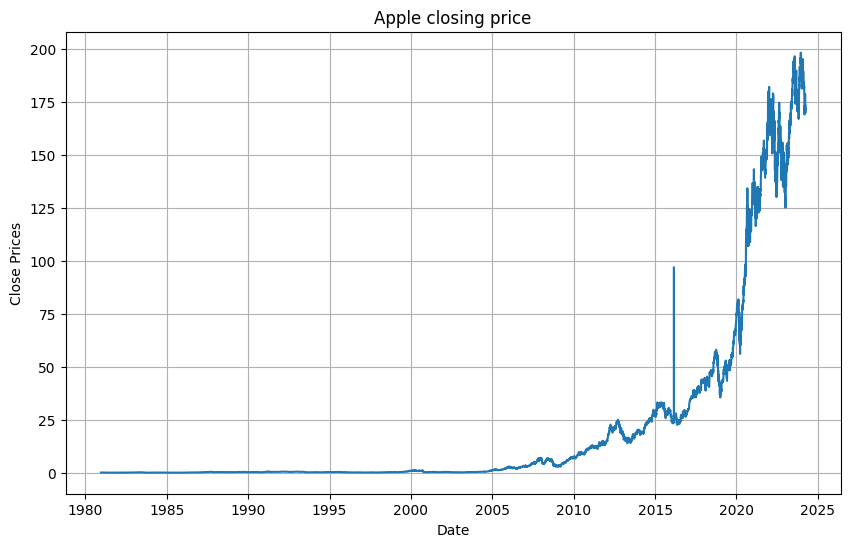

In [88]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Price'])
plt.title('Apple closing price')
plt.show()

<Axes: ylabel='Density'>

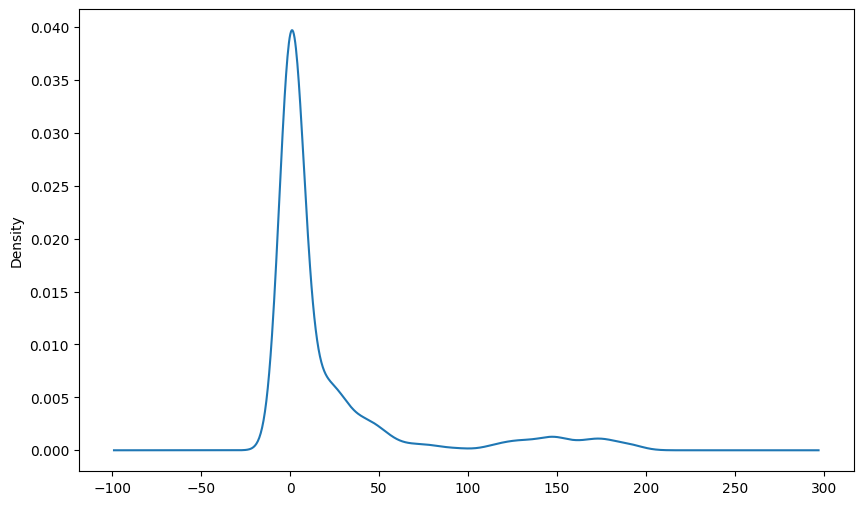

In [89]:
#Distribution of the dataset
df_close = stock_data['Price']
df_close.plot(kind='kde')

### 3. Augmented Dickey-Fuller Test

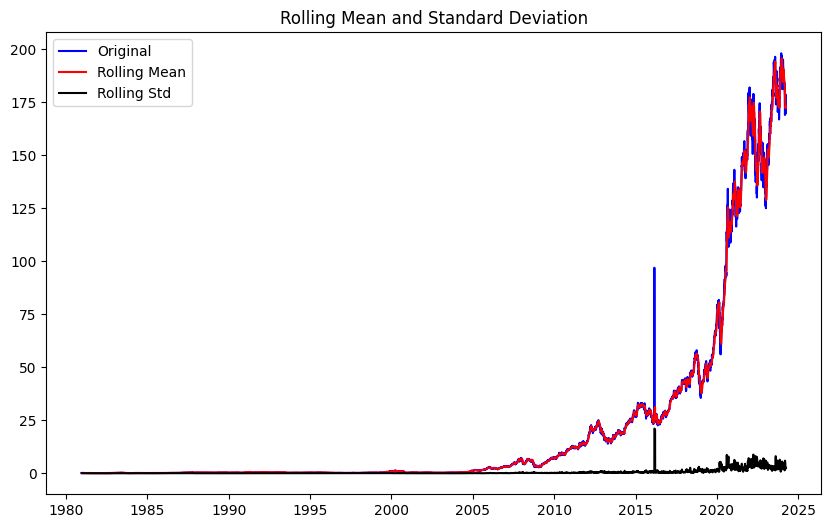

Results of dickey fuller test
Test Statistics                    2.100855
p-value                            0.998790
No. of lags used                   4.000000
Number of observations used    10907.000000
critical value (1%)               -3.430950
critical value (5%)               -2.861805
critical value (10%)              -2.566911
dtype: float64


In [90]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 1000x600 with 0 Axes>

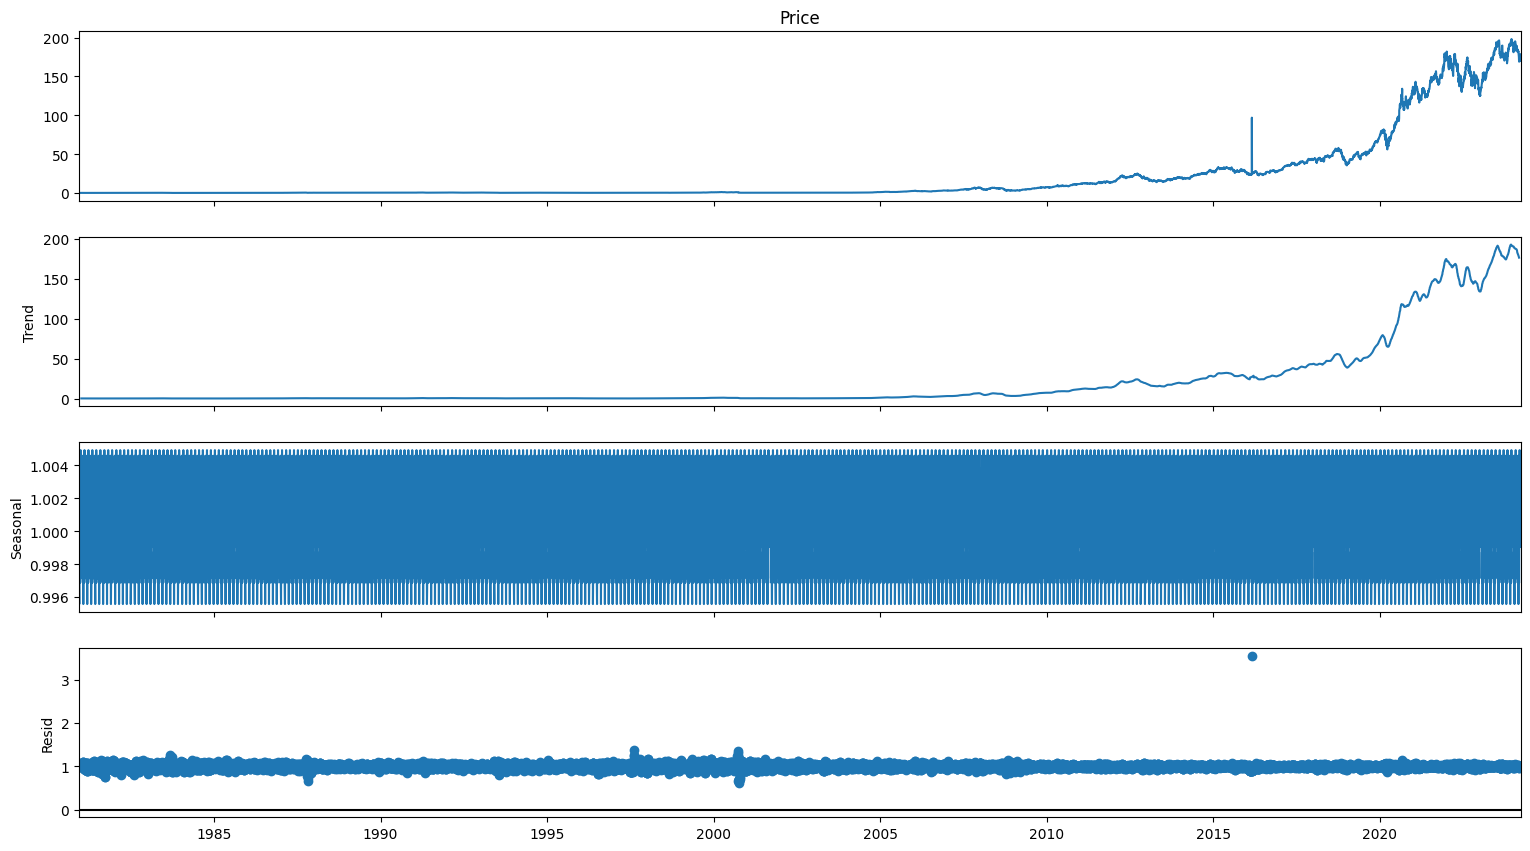

In [91]:
# To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

### 4. ACF and PACF plots

In [92]:
# Step 2: Identify 'p' and 'q' using ACF and PACF plots
def plot_acf_pacf(data):
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(data, lags=30, ax=ax[0])
    plot_pacf(data, lags=30, ax=ax[1])
    plt.show()

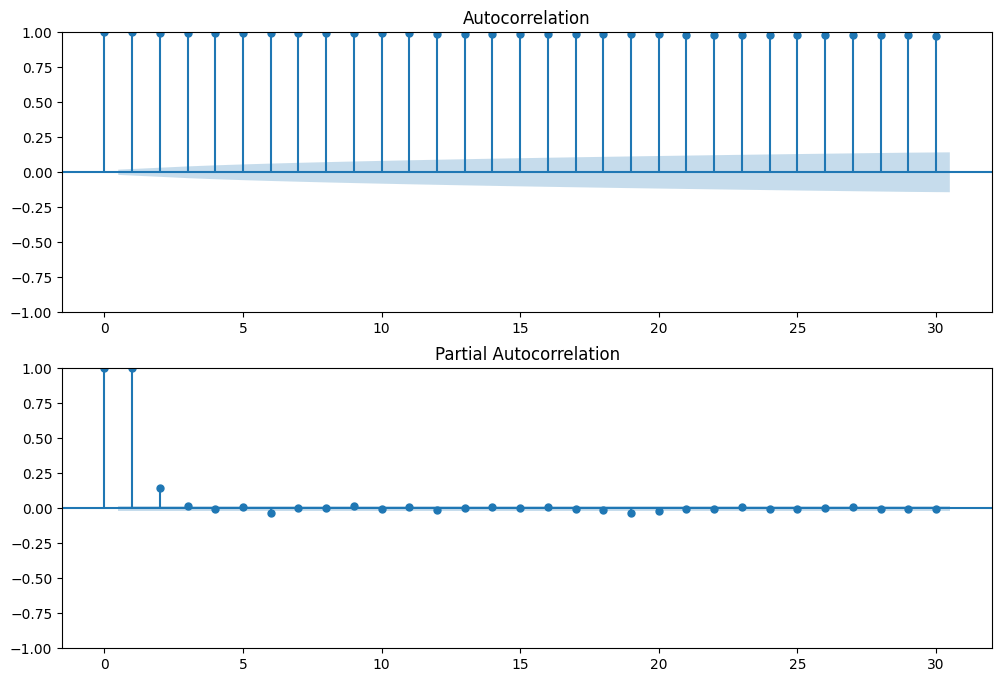

In [93]:
# Example: Plot ACF and PACF for TSLA stock
plot_acf_pacf(df_close)

### 5. ARIMA Model Fitting

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


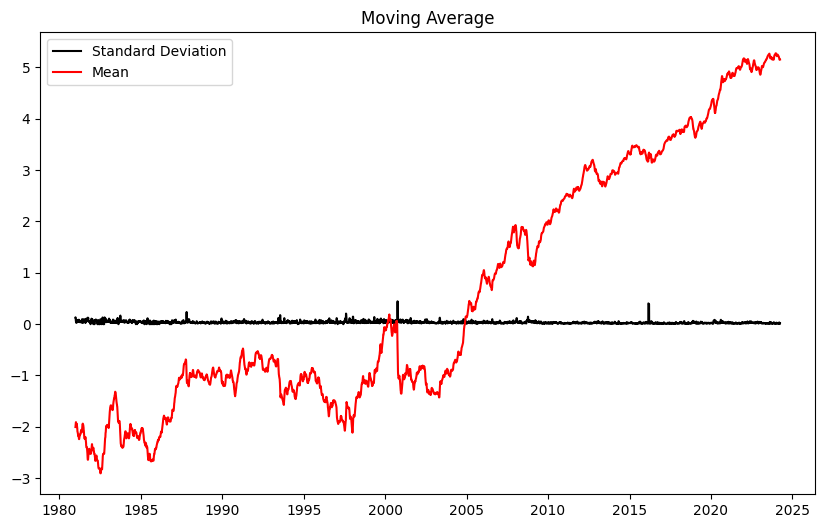

In [94]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

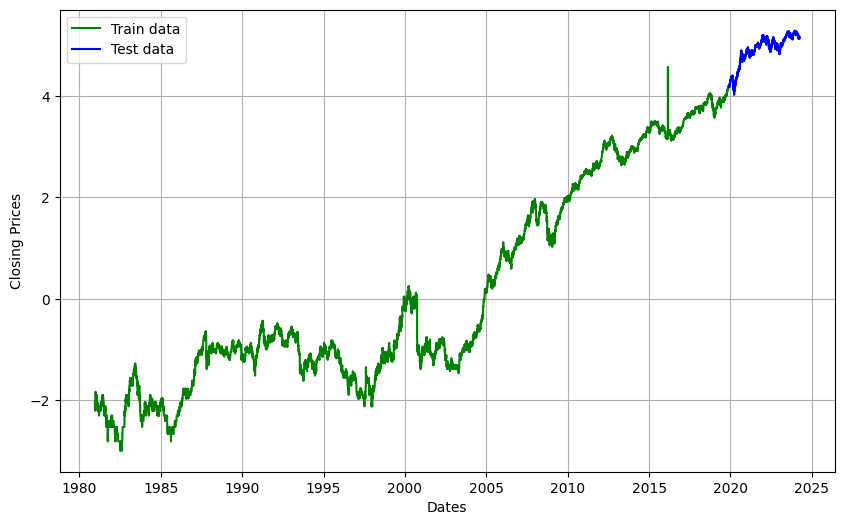

In [95]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-36070.994, Time=1.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-36492.747, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-36515.420, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-36070.263, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-36513.744, Time=2.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-36513.806, Time=2.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-36511.747, Time=2.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-36512.767, Time=0.75 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 11.178 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 9817
Model:               SARIMAX(0, 1, 1)   Log Likelihood               18260.710
Date:                Mon, 22 Apr 2024   AIC                         -36515.420
Time:              

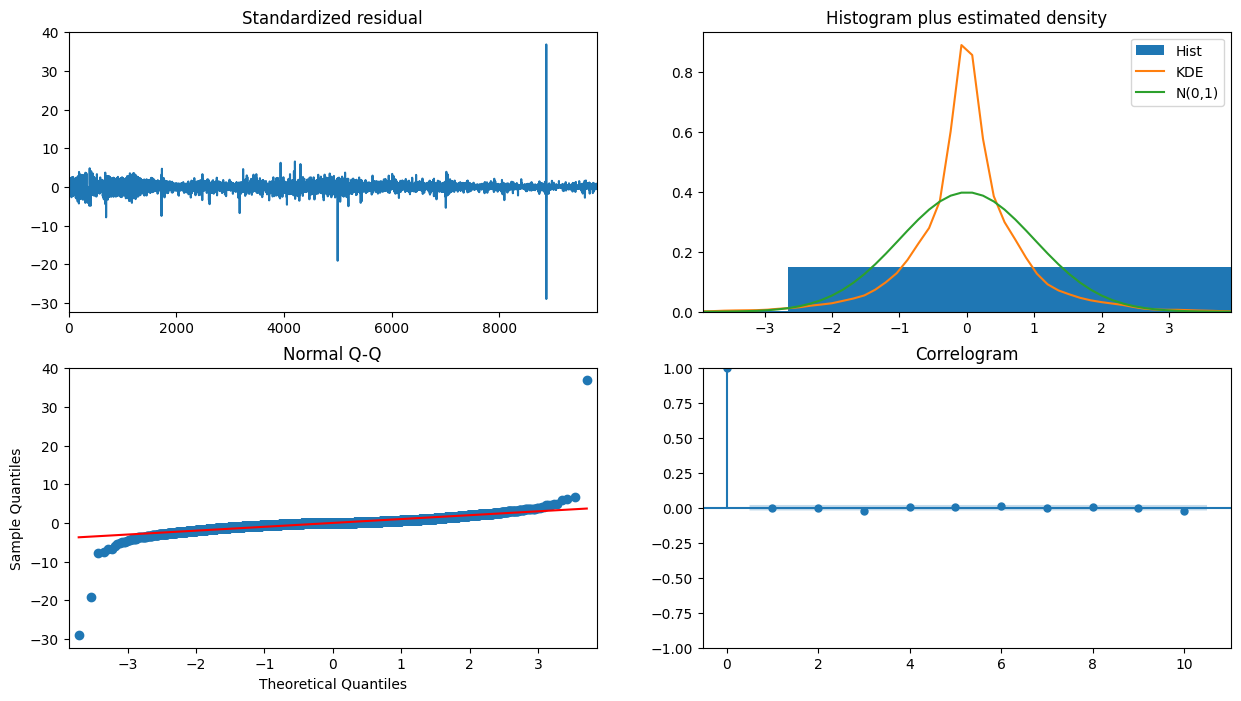

In [96]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [97]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9817
Model:                 ARIMA(1, 1, 2)   Log Likelihood               18258.533
Date:                Mon, 22 Apr 2024   AIC                         -36509.066
Time:                        23:36:06   BIC                         -36480.299
Sample:                             0   HQIC                        -36499.320
                               - 9817                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0553      1.638     -0.034      0.973      -3.266       3.155
ma.L1         -0.1603      1.638     -0.098      0.922      -3.371       3.050
ma.L2         -0.0172      0.354     -0.049      0.9

### 6. Model Evaluation

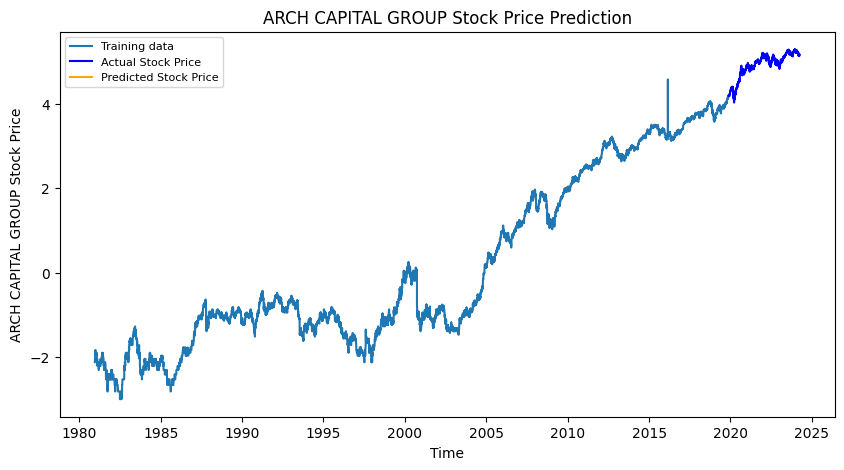

In [98]:
try:
    fc, se, conf = fitted.forecast(len(test_data), alpha=0.05)  # forecast length same as test_data length
except ValueError:  # Handles case where forecast only returns 1 value
    fc = fitted.forecast(len(test_data), alpha=0.05)  # Capture only the forecast
else:
    lower_conf, upper_conf = conf[:, 0], conf[:, 1]
    conf_series = pd.DataFrame({'lower': lower_conf, 'upper': upper_conf}, index=test_data.index)

# Make as pandas series with the same index as test_data
fc_series = pd.Series(fc, index=test_data.index)

# Plotting with confidence interval (if available)
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(train_data, label='Training data')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
if 'conf_series' in locals():  # Check if conf_series exists
    plt.fill_between(conf_series.index, conf_series['lower'], conf_series['upper'], color='k', alpha=.10)

# Customize plot
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [99]:
# Reset the index of both test_data and fc to ensure alignment
test_data_reset_index = test_data.reset_index(drop=True)
fc_reset_index = fc.reset_index(drop=True)

# Create a boolean mask that is True where fc_reset_index is not zero
non_zero_mask = fc_reset_index != 0

# Use the mask to filter out zero values from both test_data_reset_index and fc_reset_index
test_data_non_zero = test_data_reset_index[non_zero_mask]
fc_non_zero = fc_reset_index[non_zero_mask]
# report performance
mse = mean_squared_error(test_data_non_zero, fc_non_zero)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_non_zero, fc_non_zero)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_non_zero, fc_non_zero))
print('RMSE: '+str(rmse))
# Calculate MAPE without zero values
mape_non_zero = np.mean(np.abs(fc_non_zero - test_data_non_zero) / np.abs(test_data_non_zero)) * 100
print('MAPE: ', 100-mape_non_zero)

MSE: 0.6089958226772781
MAE: 0.7257401033538428
RMSE: 0.7803818441489256
MAPE:  85.54541360723137


### 7. Goodness of Fit Metrics

In [100]:
# Assess the model on goodness of fit metrics
def goodness_of_fit(actual, forecast):
    residuals = actual - forecast
    sns.histplot(residuals, kde=True)
    plt.title("Residuals Distribution")
    plt.show()

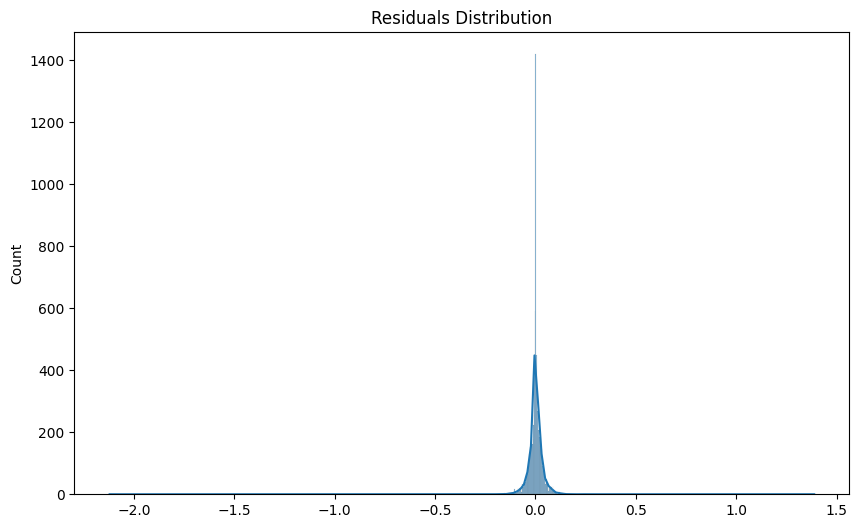

In [103]:
# train data
train_forecast = fitted.predict(
    start=train_data.index[0], end=train_data.index[-1], typ="levels"
)
goodness_of_fit(train_data, train_forecast)

### 8. Comparison with OLS Model

In [108]:
# Compare with previously trained OLS model
def train_and_predict_regression(data):
    X = data[["Open", "High", "Low"]]
    y = data["Price"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2
    )

    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train).fit()

    X_test = sm.add_constant(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    return model, y_pred_train, y_pred_test, y_train, y_test
# Fit OLS model and make predictions
model, y_pred_train, y_pred_test, y_train, y_test = train_and_predict_regression(
    stock_data
)

# Calculate RMSE for ARIMA and OLS forecasts
rmse_arima = math.sqrt(mean_squared_error(test_data_non_zero, fc_non_zero))
rmse_ols = math.sqrt(mean_squared_error(y_test, y_pred_test))
print("ARIMA RMSE: ", rmse_arima)
print("OLS RMSE: ", rmse_ols)

ARIMA RMSE:  0.7803818441489256
OLS RMSE:  0.6859019028035584


### 9. Theil's Coefficient

In [109]:
# Calculate theil's U statistic
def theil_u_statistic(y_true, y_pred):
    n = len(y_true)
    num = np.sum((y_true - y_pred) ** 2)
    den = np.sum(y_true ** 2)
    return np.sqrt(num / den) / n

# Calculate Theil's U statistic for ARIMA and OLS forecasts
theil_u_arima = theil_u_statistic(test_data_non_zero, fc_non_zero)
theil_u_ols = theil_u_statistic(y_test, y_pred_test)
print("ARIMA Theil's U: ", theil_u_arima)
print("OLS Theil's U: ", theil_u_ols)

ARIMA Theil's U:  0.00014520921325753285
OLS Theil's U:  2.939537873060879e-06


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;width:100%}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  overflow:hidden;padding:10px 10px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:16px;
  font-weight:normal;overflow:hidden;padding:10px 10px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top;}
.col1 { width: 20%;}
.col2 { width: 80%;}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-0pky col1">CONCLUSION</td>
    <td class="tg-0pky col2">
In conclusion, this experiment demonstrated the efficacy of ARIMA forecasting for stock data. By identifying model parameters, training the model, and evaluating its performance, I found ARIMA to be a valuable tool for predicting stock prices accurately.
    
   </td>
  </tr>
</tbody>
</table> 